In [41]:
import pandas as pd
import glob
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore", category=FutureWarning)

files = glob.glob('./server_results/grid_search/*.csv')


In [42]:
# not used
def plot_grouped_bar_grouped(df, x, hue, group, y, datasetname):
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(12, 6))

    # Combine hue and group into a single categorical column for better grouping
    df['combined_hue'] = df[hue].astype(str) + " | " + df[group].astype(str)

    # Plot the boxplot
    sns.boxplot(
        data=df,
        x=x,
        hue='combined_hue',  # Use the combined hue
        y=y,
        ax=ax,
        palette=sns.color_palette("Set2"),  # Use a better palette
    )

    # Set labels and title
    ax.set_xlabel(x.replace('_',' ').title(), fontsize=12)
    ax.set_ylabel(y.upper(), fontsize=12)
    ax.set_title(f'{y} Distribution for {x}, {hue}, and {group} in {datasetname}', fontsize=14)

    # Customize ticks
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # Place legend at the bottom, without border
    ax.legend(
        title=f'{hue} | {group}',
        fontsize=12,
        title_fontsize=12,
        loc='lower center',
        bbox_to_anchor=(0.5, 1.05),  # Position legend outside plot
        ncol=3,  # Arrange legend in a single row
        frameon=False  # Remove legend border
    )

    # Adjust layout to ensure everything fits
    plt.tight_layout()
    plt.show()

In [43]:
def handle_matcher_names(df):
    substitutions = {
        'header_values_default': 'H+V default',
        'header_values_simple': 'H+V simple',
        'header_values_verbose': 'H+V verbose',
        'header_values_repeat': 'H+V repeat',
        'header_values_prefix': 'H+V prefix',
        'header_only': 'V only',
    }
    df['encoding_mode'] = df['encoding_mode'].replace(substitutions)

    df['sampling_mode'] = df['sampling_mode'].str.title()

    

def best_aggregate(df):

    df_grouped = df.groupby(['encoding_mode', 'sampling_mode', 'sampling_size'])[
        'mrr'].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()

    df_grouped = df_grouped.sort_values(by='mean', ascending=False)

    print(df_grouped.head(10).to_string())
    return df_grouped


def most_high_mrr(df):
    df['method_strategy'] = df['encoding_mode'] + '_' + \
        df['sampling_mode'] + '_' + df['sampling_size'].astype(str)
    highest_mrr_counts = df.groupby('method_strategy')['mrr'].apply(
        lambda x: (x == x.max()).sum()).reset_index(name='count')
    print(highest_mrr_counts.head(10).to_string())
    return df


def plot_grouped_bar(df, x, hue, group, y, datasetname):
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(9, 4))

    print(datasetname)

    # df = df[df['sampling_mode'] == 'mixed']

    if group == 'sampling_size':
        df = df[df['sampling_size'] == 10]

    order = df.groupby(x)[y].mean().sort_values(ascending=False).index

    hue_order = df.groupby(hue)[y].mean().sort_values(ascending=False).index
    

    # Plot the boxplot
    sns.boxplot(
        data=df,
        x=x,
        hue=hue,
        y=y,
        ax=ax,
        palette=sns.color_palette("Set2"),  # Use a better palette
        order=order,
        hue_order=hue_order
        , showfliers=False

    )

    # Set labels and title
    ax.set_xlabel(x.replace('_',' ').title(), fontsize=12)
    ax.set_ylabel(y.upper(), fontsize=12)
    # ax.set_title(f'{y} Distribution for {x} and {hue} in {datasetname}', fontsize=14)#

    # Customize ticks
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # Place legend at the bottom, without border
    ax.legend(
        title=hue.replace('_',' ').title(),
        fontsize=12,
        title_fontsize=12,
        loc='lower center',
        bbox_to_anchor=(0.5, 0.98),  # Position legend outside plot
        ncol=3,  # Arrange legend in a single row
        frameon=False  # Remove legend border
    )

    # Remove the top and right spines
    sns.despine()

    # Save the figure as a high-resolution PDF
    fig.savefig("figures/grid_search_retriever_encmodes.pdf", format='pdf', dpi=300)

    # Adjust layout to ensure everything fits
    plt.tight_layout()
    plt.show()




In [44]:

all_dfs_list=[]
datasetnames =[]
for file in files:
    datasetname = file.split('_')[0]
    datasetname = file.split('/')[-1].split('_')[0]    
    datasetnames.append(datasetname)
    df = pd.read_csv(file)
    handle_matcher_names(df)
    all_dfs_list.append(df)

    if datasetname=='GDC':
        gdc_df = df

all_dfs = pd.concat(all_dfs_list)

    

In [45]:
gdc_df_filtered = gdc_df[gdc_df['target_table'] == 'Huang.csv']
gdc_df_filtered = gdc_df_filtered.sort_values(by='mrr', ascending=False)


columns_to_select = [
     'ncols_tgt', 'nrows_src', 'nrows_tgt', 'nmatches',
    'encoding_mode', 'sampling_mode', 'sampling_size', 'runtime', 'mrr', 
    'All_RecallAtSizeofGroundTruth'
]

gdc_df_filtered_selected = gdc_df_filtered[columns_to_select]
print(gdc_df_filtered_selected.head(20))


     ncols_tgt  nrows_src  nrows_tgt  nmatches encoding_mode sampling_mode  \
96         736        110       4478        19    H+V repeat        Random   
132        736        110       4478        19    H+V simple        Random   
136        736        110       4478        19    H+V simple      Frequent   
104        736        110       4478        19    H+V repeat         Mixed   
105        736        110       4478        19    H+V repeat         Mixed   
101        736        110       4478        19    H+V repeat      Frequent   
100        736        110       4478        19    H+V repeat      Frequent   
141        736        110       4478        19    H+V simple         Mixed   
137        736        110       4478        19    H+V simple      Frequent   
133        736        110       4478        19    H+V simple        Random   
102        736        110       4478        19    H+V repeat      Frequent   
117        736        110       4478        19   H+V verbose    

In [46]:
# for df in all_dfs_list:
#     best_aggregate(df)

In [47]:
# best_aggregate(all_dfs)

ChEMBL


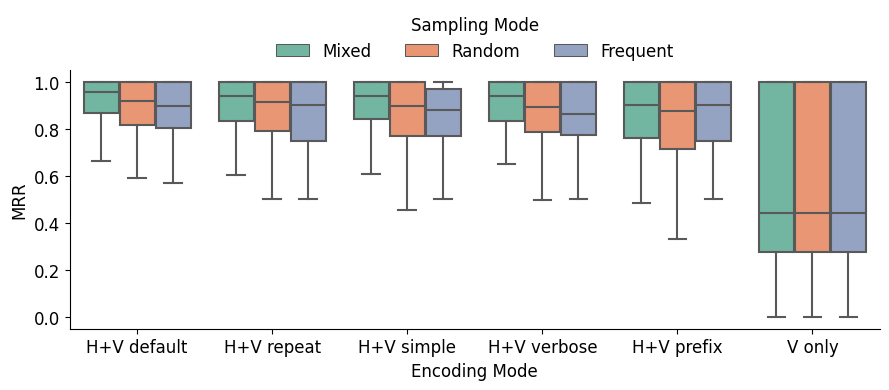

OpenData


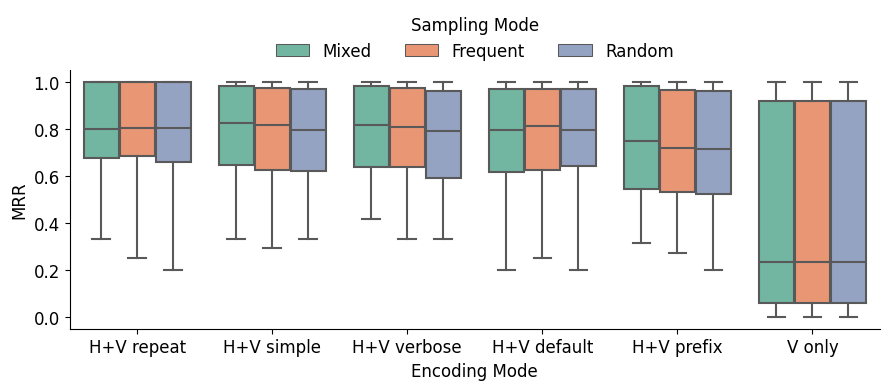

GDC


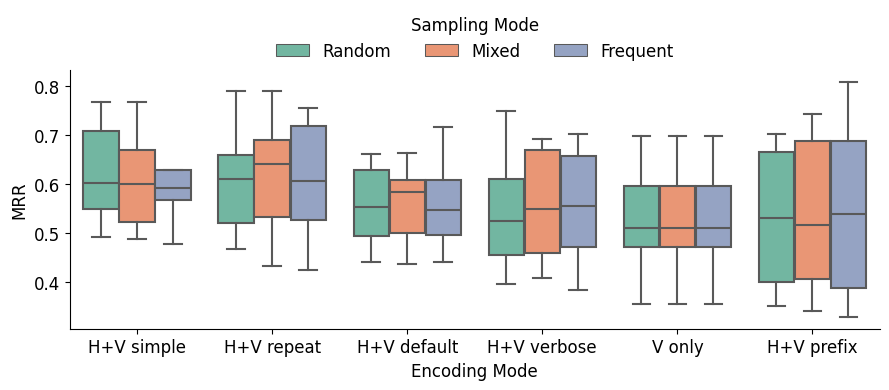

Magellan


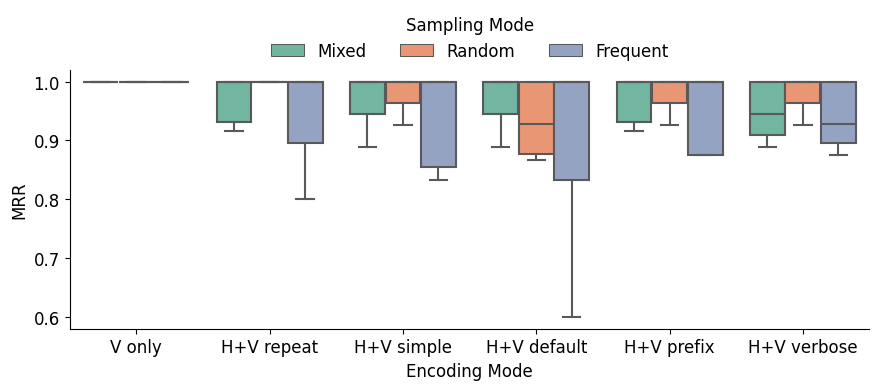

Musicians


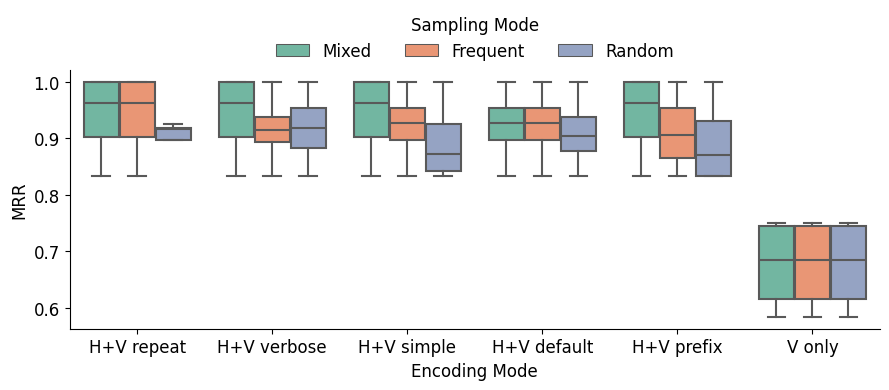

TPC-DI


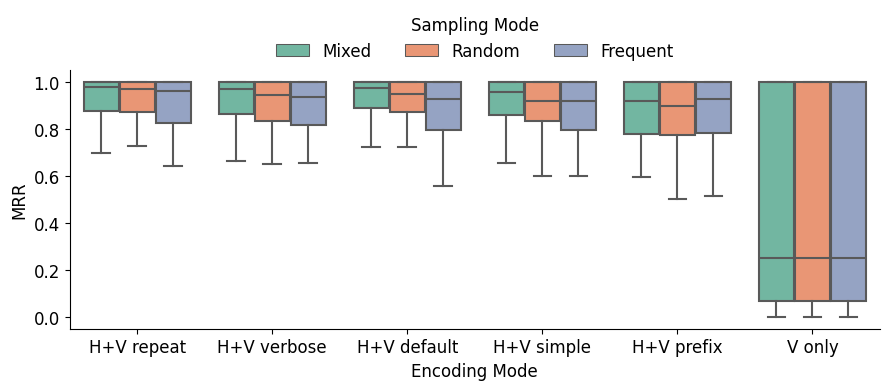

In [48]:
for i,df in enumerate(all_dfs_list):
    plot_grouped_bar(df, 'encoding_mode', 'sampling_mode',
                     'sampling_size', 'mrr', datasetnames[i])

All datasets


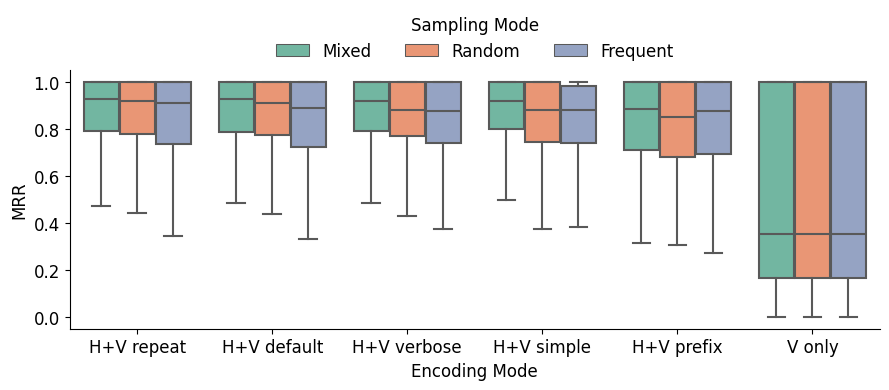

In [49]:

plot_grouped_bar(all_dfs, 'encoding_mode', 'sampling_mode', 'sampling_size', 'mrr','All datasets')